In [35]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

import os
#os.chdir('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import norm

In [2]:
os.getcwd()

'C:\\Users\\rtemporale\\Documents\\Austral\\Modulo2\\Clase3'

In [3]:
train = pd.read_csv("./bankMarketing/02 - procesada/bankMarketingTotal.csv", sep=";")

In [7]:
X = train.drop(columns = ["y", "bucketsAge"])
y = train.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   default            41188 non-null  int64  
 1   housing            41188 non-null  int64  
 2   loan               41188 non-null  int64  
 3   duration           41188 non-null  int64  
 4   campaign           41188 non-null  int64  
 5   pdays              41188 non-null  int64  
 6   previous           41188 non-null  int64  
 7   emp.var.rate       41188 non-null  float64
 8   cons.price.idx     41188 non-null  float64
 9   cons.conf.idx      41188 non-null  float64
 10  euribor3m          41188 non-null  float64
 11  nr.employed        41188 non-null  float64
 12  y                  41188 non-null  int64  
 13  student_retired    41188 non-null  int64  
 14  degree             41188 non-null  int64  
 15  previousProd       41188 non-null  int64  
 16  marriedAdmin       411

In [9]:
print(X_train.shape)
print(X_test.shape)

(27595, 35)
(13593, 35)


## Bagging
Como vimos en la clase, bagging es un ensamble bastante popular para poder resolver problemas de machine learning. El mayor exponente de esta técnica se llama Random Forest. Básicamente la idea de este ensamble es generar n muestras aleatorias de la misma base de entrenamiento según la cantidad de estimadores (o árboles) que se deciden correr. Cada una de las muestras generará un árbol con diversos parámetros. Al final se realizará una votación para poder obtener el score final.

Random forest a utilizar se encuentra en la librería de Scikit Learn y la documentación la podrán encontrar en el siguiente [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


Los parámetros que podemos ajustar en el modelo son:
**RandomForestClassifier**
* n_estimators (int): Valor default=100. Este parámetro ajusta la cantidad de árboles de decisión que se ejecutarán.
* criterion ({"gini", "entropy"}): Valor default="gini". Es la métrica que medirá la calidad del split. 
* max_depth (int): Valor default=None.  Este parámetro medirá la máxima profundidad que tendrá cada árbol. Si el valor es None, lo que hará es crecer el árbol hasta que las hojas queden puras o hasta que la cantidad de observaciones sea menor al parámetro min_samples_split. 
* min_samples_split (int o float): Valor default=2. Este parámetro nos indica la cantidad de observaciones mínimas que debe tener un nodo para que se realice un split. Si el valor ingresado es un entero, será considerado un valor absoluto (definido como el mínimo de observaciones para el split), si el valor ingresado es un float, el número será la división entre el valor ingresado y el total de observaciones de la base.
* min_samples_leaf (int o float): Valor default=1. Este parámetro nos indica cuál es el número mínimo que debe tener un nodo para ser nodo hoja. El cálculo del valor es igual al parámetro anterior.
* min_weight_fraction_leaf (float): Valor default=0. Este parámetro ayuda a determinar el tamaño mínimo del nodo final de cada uno de los árboles de decisión. El nodo final también se conoce como hoja. Esto es bastante similar a min_samples_leaf, pero en su lugar utiliza una fracción de la suma total de observaciones.
* max_features (int, float o {"auto", "sqrt", "log2"}): Valor default=None. El número de variables a considerar para buscar el mejor split. Si el valor es int, se considera como el número maxímo de variables. Si el valor es float, se calculará como multiplicación de max_features y la cantidad total de variables. Si el valor es auto, se calcula como la raíz cuadrada del total de variables lo mismo que si el parámetro posee el valor sqrt. Si el parámetro posee el valor log2, entonces se calculará como el log2 del total de variables. Si el valor es None, se usarán todas las variables.
* max_leaf_nodes (int): Valor default=None. Es la cantidad máxima de de nodos hoja que vamos a querer tener en un árbol. 
* min_impurity_decrease (float): Valor default=0. Un nodo se dividirá si el split genera un decrecimiento en la impureza menor o igual al valor definido.
* booststrap (boolean): Valor default=True. Este parámetro se utiliza para saber si el algoritmo utiliza bootstrap para seleccionar las observaciones de cada uno de las muestras para armar cada uno de los árboles. Si el parámetro es False, se utilizará todo el dataset para construir cada uno de los árboles 
* oob_score (boolean): Valor default=False. Este parámetro se utiliza para poder decirle al algoritmo si se quiere utilizar muestras out-of-bag para estimar precición de la generalización.
* n_jobs (int): Valor default=None. Este parmámetro nos indica la cantidad de jobs que queremos que corran en paralelo.
* random_state (int): Valor default=None. Controla el factor aleatorio del estimador. Este parámetros es muy utilizado para poder lograr que las ejecuciones sean siempre iguales (teniendo en cuenta que usamos los mismos hiperparámetros).
* verbose (int): Valor default=0. Controla los mensajes que nos aparecerán a la hora de entrenar y predecir un modelo.
* warm_start (boolean): Valor default=False. Si el parámetro se encuentra seteado en True, lo que hará la solución es elegir los valores que corrieron anteriormente y luego entrenará mas estimadores al ensemble. Si esta seteado en False, se entrenará un nuevo forest.
* class_weight ({“balanced”, “balanced_subsample”}, diccionario o lista de diccionarios). Valor default=None. Este parámetro se utilza para cuando las clases no se encuentran balanceadas, por ende el algoritmo modificará los pesos según el desbalanceo que exista en la clase.
* ccp_alpha (float no negativo): Valor default=0. Parámetro de complejidad utilizado para la poda de costo mínimo-complejidad. Se elegirá el subárbol que posea el mayor valor pero siempre siendo menor al ccp_alpha definido.
* max_samples (int o float): Valor default=None. Si el parámetro bootstrap está seteado en True, será el número máximo de observaciones que tomará cada una de las muestras. Si el valor es None, tomará todas las muestras. Si es un valor entero, será el número máximo que se podrá tomar para cada muestra. Si es un valor float, se calculará como la proporción del total de las observaciones.


In [15]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [21]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [16]:
predictionsProbabilities = clf.predict_proba(X_test)
predictions = clf.predict(X_test)

In [23]:
predictionsProbabilities

array([[0.90425987, 0.09574013],
       [0.95585364, 0.04414636],
       [0.91528684, 0.08471316],
       ...,
       [0.94262533, 0.05737467],
       [0.94442368, 0.05557632],
       [0.94139886, 0.05860114]])

se toman como TRUE las probabilidades > 0.5 -- predictionsProbabilities con prob > 0.5 = predictions

In [31]:
predictionsProbabilities[:, 1]>0.5

array([False, False, False, ..., False, False, False])

In [27]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
confusion_matrix(y_test, predictions)

array([[12011,    45],
       [ 1314,   223]], dtype=int64)

In [40]:
accuracy_score(y_test, predictions)

0.9000220701831825

In [44]:
recall_score(y_test,predictions)

0.14508783344176968

In [42]:
precision_score(y_test,predictions)

0.832089552238806

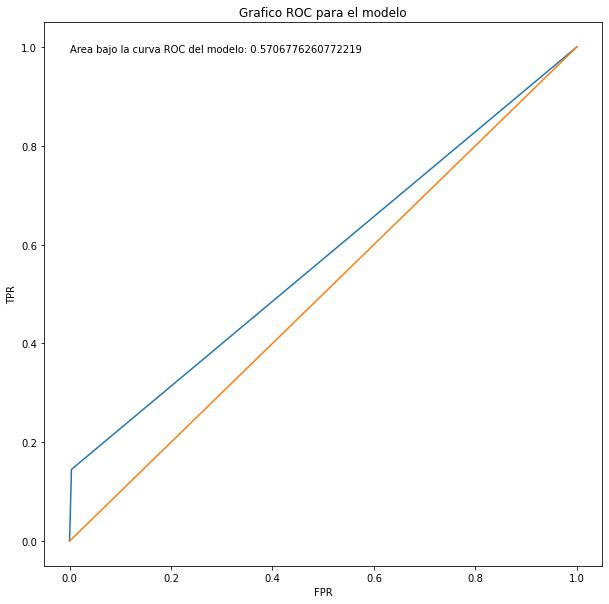

In [50]:
areaBajoCurvaRoc = roc_auc_score(y_test, predictions)
fpr, tpr, _ = roc_curve(y_test, predictions)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (0,0.99))
plt.show()

A continuación lo que vamos a hacer es armar las funciones de densidad de las probabilidades de cada uno de los valores del target. Con este gráfico lo que vamos a poder identificar es el solapamiento que pueden llegar a existir entre los diferentes scores. Como vimos anteriormente, cuando graficamos la curva roc, si logramos que las curvas no se solapan, podemos encontrar el modelo perfecto, no obstante, esto es prácticamente imposible, si lo logramos, lo que debemos tener en cuenta es que muy probablemente hayamos overfitteado.

A la tabla X_test, le agrego las columnas "target" (valores de y) "score" con los datos de predictionsProbabilities calculados antes

In [59]:
X_test["target"] = y_test
X_test["score"] = predictionsProbabilities[:,1]

In [60]:
X_test

,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,student_retired,degree,previousProd,marriedAdmin,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,cuartilesAge,decilesAge,target,score
32884,0,0,1,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9,0,0.095740
3169,0,1,0,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,8,0,0.044146
32206,0,0,0,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,2,0,0.084713
9403,0,0,0,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,4,0,0.048330
14020,0,1,0,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.058035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0,0,0,232,1,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,7,0,0.044157
24479,0,0,0,168,2,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,3,9,0,0.059322
14673,0,1,0,98,2,999,0,1.4,93.918,-42.7,4.961,5228.1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3,8,0,0.057375
20582,0,1,0,136,5,999,0,1.4,93.444,-36.1,4.966,5228.1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,8,0,0.055576


<Figure size 432x288 with 0 Axes>

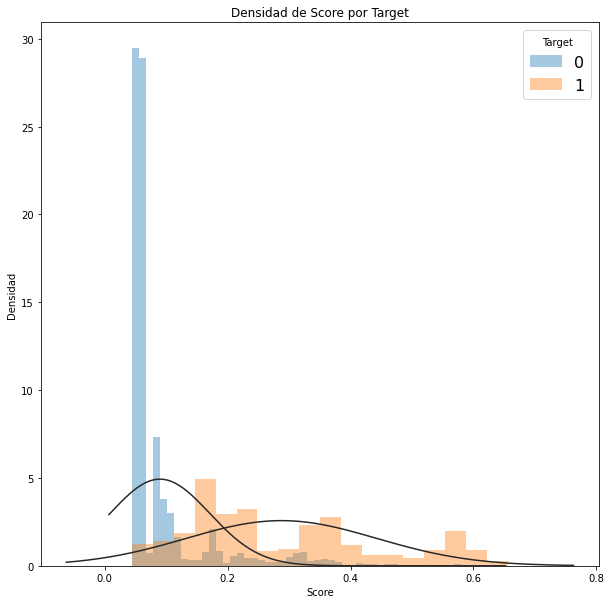

In [101]:
targets = [0,1]
plt.clf()
plt.figure(figsize=(10,10))

for target in targets:
    subset = X_test[X_test.target == target]    
    # Draw the density plot
    sns.distplot(subset['score'],fit=norm, hist = True, kde=False, label = target)    
    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'Target')
    plt.title('Densidad de Score por Target')
    plt.xlabel('Score')
    plt.ylabel('Densidad')
    display()

Ahora lo que vamos a hacer es armar una tabla muy interesante para poder medir como vienen los scores abiertos por diferentes tipos de buckets. Primero dividiendo el score cada 100. También dividir el score en deciles.
Tengan en cuenta que para poder medir si un modelo se degrada o no, lo ideal es guardar los buckets que arman los deciles originales para luego usar esas mismas cotas para poder medir meses subsiguientes.

Tener en cuenta que los scores superiores a 0.5 se consideran como positivos (1)
para poder amar buckets de 100 en 100 se multiplican los scores por 1000, y luego a estos buckets los asignamos a un decil, vemos que quedan en un rango de 43.7 a 655.8

In [102]:
#Normalizo el score multiplicando por 1000
X_test["scoreNormalizado"] = X_test.score * 1000
#Armo los buckets cada 100 puntos 
X_test["bucket"] = pd.cut(X_test.scoreNormalizado, np.array([0,100,200,300,400,500,600,700,800,900,1000]))
#Armo los deciles por scores
X_test['decile'] = pd.qcut(X_test.score, 10, labels=False)
#Armo un dataframe con los valores mínimos y máximos por cada uno de los deciles. Así después se podrá calcular 
#si los modelos se degradan o no
deciles = X_test.groupby("decile").agg({"scoreNormalizado":["min", "max"]}).reset_index()
deciles.columns = ["decil", "minimo", "maximo"]


los 10 rangos quedan de la siguiente manera

In [104]:
deciles

,decil,minimo,maximo
0,0,43.734468,44.370751
1,1,44.387326,48.262470
2,2,48.273228,54.801055
3,3,54.823403,56.783958
4,4,56.828939,58.034593
5,5,58.037695,75.004519
6,6,75.032388,92.406687
7,7,92.509431,169.493285
8,8,169.578421,279.719891
9,9,279.929287,655.795250


Armamos un array tomando los valores máximos como extremos de cada rango, comenzando en 0

In [105]:
values = np.append(np.array(0), deciles.maximo.values)

In [70]:
values

array([  0.        ,  44.37075108,  48.26246993,  54.80105528,
        56.78395784,  58.03459334,  75.00451922,  92.40668693,
       169.49328465, 279.71989104, 655.79524973])

Agregamos columna con estos rangos

In [106]:
X_test['originalDecile'] = pd.cut(X_test.scoreNormalizado, values)

In [107]:
X_test

,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,student_retired,degree,previousProd,marriedAdmin,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,cuartilesAge,decilesAge,target,score,scoreNormalizado,bucket,decile,originalDecile
32884,0,0,1,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,3,9,0,0.095740,95.740133,"(0, 100]",7,"(92.407, 169.493]"
3169,0,1,0,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,8,0,0.044146,44.146359,"(0, 100]",0,"(0.0, 44.371]"
32206,0,0,0,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,2,0,0.084713,84.713163,"(0, 100]",6,"(75.005, 92.407]"
9403,0,0,0,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,4,0,0.048330,48.330207,"(0, 100]",2,"(48.262, 54.801]"
14020,0,1,0,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.058035,58.034593,"(0, 100]",4,"(56.784, 58.035]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0,0,0,232,1,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,7,0,0.044157,44.157363,"(0, 100]",0,"(0.0, 44.371]"
24479,0,0,0,168,2,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,3,9,0,0.059322,59.322063,"(0, 100]",5,"(58.035, 75.005]"
14673,0,1,0,98,2,999,0,1.4,93.918,-42.7,4.961,5228.1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3,8,0,0.057375,57.374672,"(0, 100]",4,"(56.784, 58.035]"
20582,0,1,0,136,5,999,0,1.4,93.444,-36.1,4.966,5228.1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,8,0,0.055576,55.576318,"(0, 100]",3,"(54.801, 56.784]"


In [108]:

measures = X_test.groupby("decile").agg({"target": ["count"]})
measures.columns=["Total decil"]
measures["Exitoso"] = X_test.groupby("decile").agg({"target": ["sum"]})
measures["Fracaso"] = measures["Total decil"]-measures["Exitoso"]
measures["% aciertos Fracaso"] = (measures["Fracaso"] / len(X_test[X_test.target == 0])).round(2)
measures["% aciertos Exito"] = (measures["Exitoso"] / len(X_test[X_test.target == 1])).round(2)
measures = measures.sort_index(ascending = False)
a = measures[["% aciertos Fracaso", "% aciertos Exito"]]\
                .cumsum()\
                .rename(columns={"% aciertos Fracaso": "%AciertosFracaso_acum.", "% aciertos Exito": "%AciertosExito_acum."})

measures = measures.join(a)
measures

,Total decil,Exitoso,Fracaso,% aciertos Fracaso,% aciertos Exito,%AciertosFracaso_acum.,%AciertosExito_acum.
decile,,,,,,,
9,1360,676,684,0.06,0.44,0.06,0.44
8,1359,558,801,0.07,0.36,0.13,0.80
7,1358,218,1140,0.09,0.14,0.22,0.94
6,1360,21,1339,0.11,0.01,0.33,0.95
5,1293,25,1268,0.11,0.02,0.44,0.97
4,1397,8,1389,0.12,0.01,0.56,0.98
3,1387,5,1382,0.11,0.00,0.67,0.98
2,1295,16,1279,0.11,0.01,0.78,0.99
1,1388,10,1378,0.11,0.01,0.89,1.00


Vemos que los deciles 7, 8 y 9 cubren el 94% de los aciertos positivos (casos que terminaron en depósito a plazo)
